In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pyplot

# Overall

In [5]:
df = pd.read_csv("data/movie_statistic_dataset.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4380 non-null   object 
 1   production_date       4380 non-null   object 
 2   genres                4380 non-null   object 
 3   runtime_minutes       4380 non-null   float64
 4   director_name         4380 non-null   object 
 5   director_professions  4380 non-null   object 
 6   director_birthYear    4380 non-null   object 
 7   director_deathYear    4380 non-null   object 
 8   movie_averageRating   4380 non-null   float64
 9   movie_numerOfVotes    4380 non-null   float64
 10  approval_Index        4380 non-null   float64
 11  Production budget $   4380 non-null   int64  
 12  Domestic gross $      4380 non-null   int64  
 13  Worldwide gross $     4380 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 479.2+ KB


We have 7 numerical features and 7 categorical:

(do przetłumaczenia)
* movie_title: jakościowa nominalna -> (raczej) unikalna dla filmu, nie będzie brana pod uwagę
* production_date: w obecnej formie raczej jakosciowa uporządkowana ale idk -> mozna wyłuskać rok, porę roku (np. klaster: filmy swiateczne w zime). Być moze bedzie to bardzeij wartosciowe niz surowa data
* genres: jakościowa nominalna -> zamieniłbym na kolumny typu is_action, is_adventure itd
* runtime_minutes: ilosciowa ilorazowa -> moze jakis skaler idk
* director_name: jakościowa nominalna -> trzeba srpawdzic ilu jest rezyserów (nie mogę napisać z z kropką w vs code xd)
* director_professions: to samo co genres
* director_birthYear: ilosciowa przedziałowa
* director_deathYear: do zamiany na is_alive lub połączyć jakoś z dorector_birthYear i przerobić na epokę zycia twórczego typu (nowoczesność, przełom wieków, PRL, powojnie, wojna, międzywojnie, itd...) lub w połączeniu z production_date na epokę zycia rezysera (np. nakrecil to w czasie studiow, po 30, po 40, był u schyłku kariery)
* movie_averageRating: ilościowa ilorazowa?
* movie_numerOfVotes: ilościowa ilorazowa
* approval_Index: idk co to jest
* Production budget $: ilościowa ilorazowa
* Domestic gross $: ilościowa ilorazowa
* Worldwide gross $: ilościowa ilorazowa

In [7]:
df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


>There are no NAs but there are some missing values that are coded with "-". We will take a closer look at them in further steps.

In [8]:
df.loc[df.duplicated(),:]

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $


> There are no duplicates.

# Directors data

In [9]:
print(f'{"Column":<20s}|', f'{"Num of -":<20s}|', "Num of unique values")
print('-'*64)
for col in df.select_dtypes(include= "object").columns.values:
    print(f'{col:<20s}|', f'{(df[col] == "-").sum():<20d}|', f'{df[col].nunique():<20d}')  

Column              | Num of -            | Num of unique values
----------------------------------------------------------------
movie_title         | 0                   | 4241                
production_date     | 0                   | 2458                
genres              | 0                   | 354                 
director_name       | 326                 | 1835                
director_professions| 333                 | 317                 
director_birthYear  | 326                 | 103                 
director_deathYear  | 326                 | 63                  


there are 326 movies without known directors and data connected with them and also 7 additional movies without known directors' professions

In [10]:
df.loc[(df["director_professions"] == "-") & (df["director_name"] != "-"), ["movie_title", "director_name"]]

,movie_title,director_name
1061,Race to Witch Mountain,Andy Fickman
1466,Paul Blart: Mall Cop 2,Andy Fickman
2025,Parental Guidance,Andy Fickman
2216,The Game Plan,Andy Fickman
2377,You Again,Andy Fickman
3596,"Juliet, Naked",Jesse Peretz
3674,Our Idiot Brother,Jesse Peretz


In [11]:
df.loc[df["director_name"].isin(["Andy Fickman", "Jesse Peretz"])]

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
1061,Race to Witch Mountain,2009-03-13,"Action,Adventure,Family",98.0,Andy Fickman,-,\N,alive,5.7,60790.0,4.487696,50000000,67172595,105103784
1466,Paul Blart: Mall Cop 2,2015-04-10,"Action,Comedy,Crime",94.0,Andy Fickman,-,\N,alive,4.4,38564.0,3.286789,38000000,71091594,107453907
2025,Parental Guidance,2012-12-25,"Comedy,Family",105.0,Andy Fickman,-,\N,alive,6.0,26184.0,4.359005,25000000,77267296,120832383
2216,The Game Plan,2007-09-28,"Comedy,Family,Sport",110.0,Andy Fickman,-,\N,alive,6.2,76413.0,4.997255,22000000,90648202,146590987
2377,You Again,2010-09-24,"Comedy,Romance",105.0,Andy Fickman,-,\N,alive,5.7,52749.0,4.428195,20000000,25702053,32838945
3596,"Juliet, Naked",2018-08-17,"Comedy,Drama,Music",97.0,Jesse Peretz,-,1968,alive,6.6,23288.0,4.751172,6000000,3444895,5767158
3674,Our Idiot Brother,2011-08-26,"Comedy,Drama",90.0,Jesse Peretz,-,1968,alive,6.4,88870.0,5.233823,5000000,24814830,25861249


Fortunately, these are the only movies of those directors

In [12]:
movies_without_directors = df.loc[df["director_name"] == "-", ["movie_title"]]

Maybe, we can find some data on IMDB if we need to 🤷🏽‍♂️

# Genres data

In previous point, we have found that there are only 354 unique combinations of genres.

In [13]:
genres = df["genres"]
genres_splitted = genres.str.split(',',expand=True)
genres_splitted_to_one_column = pd.DataFrame(genres_splitted.to_numpy().reshape((-1,1)), columns=["genre"])

Let's see what are  possible genres

In [14]:
genres_splitted_to_one_column.iloc[:,0].unique()

array(['Action', 'Adventure', 'Fantasy', 'Drama', 'Sci-Fi', 'Thriller',
       'Animation', 'Comedy', None, 'Family', 'Crime', 'Mystery',
       'Western', 'Romance', 'Musical', 'Horror', 'History', 'Biography',
       'Documentary', 'War', 'Sport', 'Music', '\\N', 'Film-Noir', 'News'],
      dtype=object)

In [52]:
genres_splitted_to_one_column["genre"].value_counts()

genre
Drama          2210
Comedy         1656
Action         1211
Adventure       968
Crime           780
Romance         724
Thriller        668
Horror          456
Mystery         409
Sci-Fi          379
Fantasy         350
Biography       338
Family          265
Animation       241
History         149
Music           145
Sport           114
War              86
Documentary      67
Musical          56
Western          44
Film-Noir         7
\N                2
News              1
Name: count, dtype: int64

<Axes: xlabel='genre'>

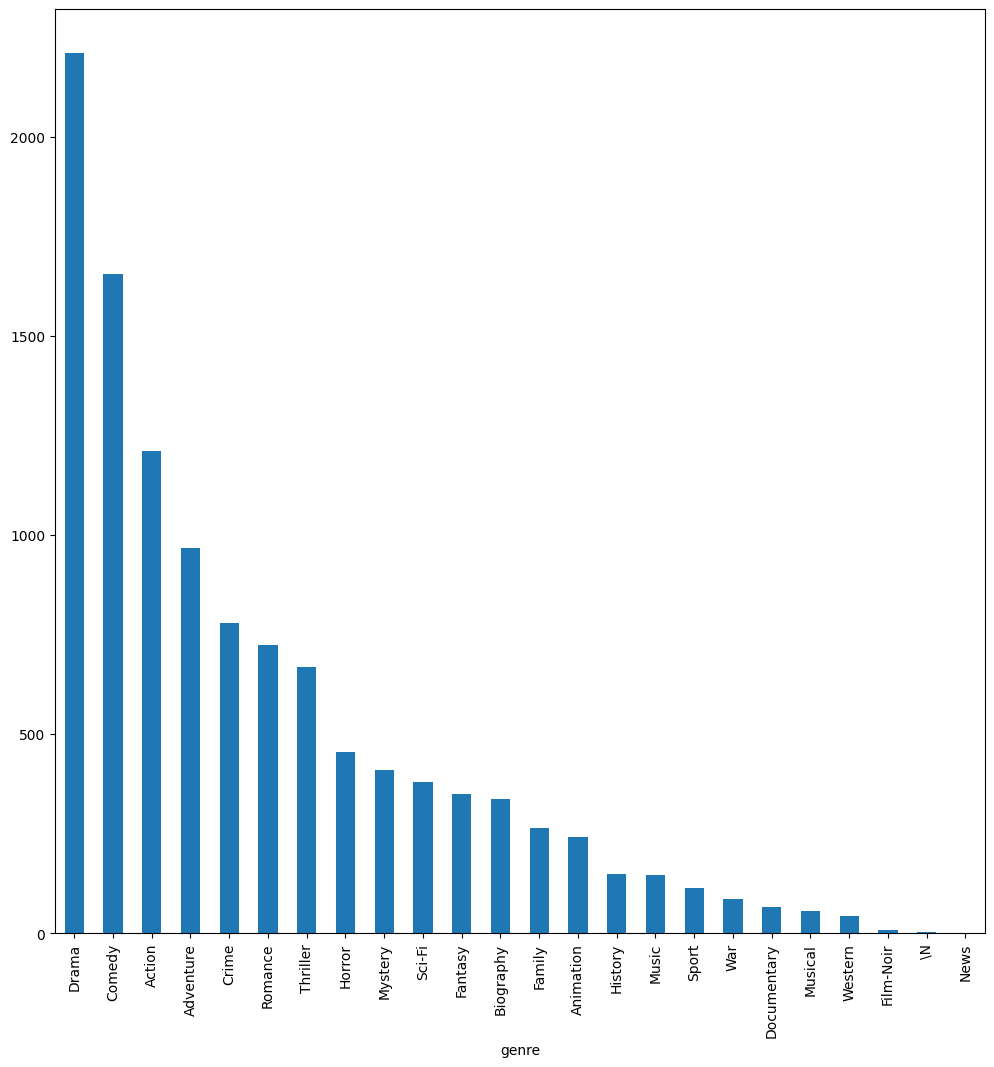

In [16]:
genres_splitted_to_one_column["genre"].value_counts().plot(kind = "bar", figsize= (12,12))

### Feature engineering

In [20]:
for genre in genres_splitted_to_one_column.genre.unique():
    if genre == '\\N' or genre == 'News': continue
    df[f'is_{genre}'] = np.repeat(0, df.shape[0])

In [23]:
df.columns.values

array(['movie_title', 'production_date', 'genres', 'runtime_minutes',
       'director_name', 'director_professions', 'director_birthYear',
       'director_deathYear', 'movie_averageRating', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'Worldwide gross $', 'is_Action', 'is_Adventure', 'is_Fantasy',
       'is_Drama', 'is_Sci-Fi', 'is_Thriller', 'is_Animation',
       'is_Comedy', 'is_None', 'is_Family', 'is_Crime', 'is_Mystery',
       'is_Western', 'is_Romance', 'is_Musical', 'is_Horror',
       'is_History', 'is_Biography', 'is_Documentary', 'is_War',
       'is_Sport', 'is_Music', 'is_Film-Noir'], dtype=object)

In [37]:
df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,...,is_Romance,is_Musical,is_Horror,is_History,is_Biography,is_Documentary,is_War,is_Sport,is_Music,is_Film-Noir
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,...,0,0,0,0,0,0,0,0,0,0
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,...,0,0,0,0,0,0,0,0,0,0
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,...,0,0,0,0,0,0,0,0,0,0
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,...,0,0,0,0,0,0,0,0,0,0
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
def set_true_in_genre_column_for_row(row):
    genres = row['genres'].split(',')
    for genre in genres:
        if genre == '\\N' or genre == 'News': continue
        row[f'is_{genre}'] = 1
    return row

df_new = df.apply(set_true_in_genre_column_for_row, axis=1)

In [45]:
df_new.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,...,is_Romance,is_Musical,is_Horror,is_History,is_Biography,is_Documentary,is_War,is_Sport,is_Music,is_Film-Noir
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,...,0,0,0,0,0,0,0,0,0,0
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,...,0,0,0,0,0,0,0,0,0,0
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,...,0,0,0,0,0,0,0,0,0,0
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,...,0,0,0,0,0,0,0,0,0,0
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_new.columns.values

array(['movie_title', 'production_date', 'genres', 'runtime_minutes',
       'director_name', 'director_professions', 'director_birthYear',
       'director_deathYear', 'movie_averageRating', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'Worldwide gross $', 'is_Action', 'is_Adventure', 'is_Fantasy',
       'is_Drama', 'is_Sci-Fi', 'is_Thriller', 'is_Animation',
       'is_Comedy', 'is_None', 'is_Family', 'is_Crime', 'is_Mystery',
       'is_Western', 'is_Romance', 'is_Musical', 'is_Horror',
       'is_History', 'is_Biography', 'is_Documentary', 'is_War',
       'is_Sport', 'is_Music', 'is_Film-Noir'], dtype=object)

In [55]:
df_new.loc[(df_new["genres"].str.contains("Western")), ["genres", 'is_Action', 'is_Adventure', 'is_Fantasy',
       'is_Drama', 'is_Sci-Fi', 'is_Thriller', 'is_Animation',
       'is_Comedy', 'is_None', 'is_Family', 'is_Crime', 'is_Mystery',
       'is_Western']].shape

(44, 14)

# Prepare function

In [86]:
def _create_binary_features_from_str_feature(row: pd.Series, str_feature_name: str, delimiter: str = ",", skip_values: list = []) -> pd.Series:
    values = row[str_feature_name].split(delimiter)
    for v in values:
        if v in skip_values: continue
        row['is_{0}_{1}'.format(*[str_feature_name,v])] = 1
    return row

def OneHotEncoder_For_Str_Complex_Feature(data_frame: pd.DataFrame, str_feature_name: str, delimiter: str = ",", skip_values: list = [] ) -> pd.DataFrame:
    df = data_frame.apply(lambda row: _create_binary_features_from_str_feature(row, str_feature_name,delimiter,skip_values), axis=1).drop(columns = str_feature_name)
    colnames = df.filter(regex=f"is_{str_feature_name}").columns.values.tolist()
    df[colnames]= df[colnames].fillna(0).astype(np.int64)
    return df

In [87]:
df = pd.read_csv("data/movie_statistic_dataset.csv")

### Apply to genres

In [88]:
df_new =  OneHotEncoder_For_Str_Complex_Feature(df,"genres",skip_values=["\\N","News"])

In [89]:
df_new.head()

,Domestic gross $,Production budget $,Worldwide gross $,approval_Index,director_birthYear,director_deathYear,director_name,director_professions,is_genres_Action,is_genres_Adventure,...,is_genres_Sci-Fi,is_genres_Sport,is_genres_Thriller,is_genres_War,is_genres_Western,movie_averageRating,movie_numerOfVotes,movie_title,production_date,runtime_minutes
0,667830256,460000000,2265935552,7.061101,1954,alive,James Cameron,"writer,producer,director",1,1,...,0,0,0,0,0,7.8,277543.0,Avatar: The Way of Water,2022-12-09,192.0
1,858373000,400000000,2794731755,8.489533,-,-,-,-,1,1,...,0,0,0,0,0,8.4,1143642.0,Avengers: Endgame,2019-04-23,181.0
2,241071802,379000000,1045713802,6.272064,1960,alive,Rob Marshall,"director,miscellaneous,producer",1,1,...,0,0,0,0,0,6.6,533763.0,Pirates of the Caribbean: On Stranger Tides,2011-05-20,137.0
3,459005868,365000000,1395316979,7.214013,1964,alive,Joss Whedon,"writer,producer,director",1,1,...,1,0,0,0,0,7.3,870573.0,Avengers: Age of Ultron,2015-04-22,141.0
4,678815482,300000000,2048359754,8.460958,-,-,-,-,1,1,...,1,0,0,0,0,8.4,1091968.0,Avengers: Infinity War,2018-04-25,149.0


### Apply to director_proffesions

In [ ]:
#TO DO

# Numerical data

# Correlation